# Pandas & RandomForest

### 랜덤 포레스트 사용하기 : 버섯 분류(독버섯과 식용버섯)


- 랜덤 포레스트를 사용한 독버섯 분류 예제 1

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [56]:
# 데이터 읽어 들이기--- (※1)
data = pd.read_csv("mushrooms.csv")
# data = pd.read_csv('mushroom.csv', columns = col)

In [57]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


머쉬룸 ![머쉬룸](mushroom_diagram.jpg)

## 1. 데이터 살펴보기

### 구조 살펴보기(X, Y / 데이터타입 / 불필요한 데이터 정리(Null 등))

In [58]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.tail()

In [ ]:
data.shape  # 크기

In [ ]:
data.describe   #head + tail + shape

In [ ]:
data.dtypes  # column 별 데이터 타입 확인 / object, int, float..

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [ ]:
pd.isnull(data)  # null 값을 찾는 메트릭스   <--> pd.notnull(data)

In [ ]:
import numpy as np
np.where(pd.isnull(data))     #Null 값이 있는 위치 찾음

### 2. 시각화 ( 변수간 영향 파악 / 주요요인 가정 등)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 그림 사이즈 기본지정 가능.  figsize 속성으로 중간에 변경 가능함
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,3)

In [13]:
# 기본적으로 matplotlib 은 한글 지원 X.  한글 지원 가능한 글씨체로 변경 필요

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [ ]:
platform.system()

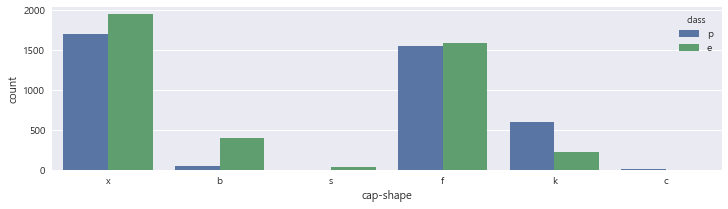

In [60]:
sns.countplot(data=data, x='cap-shape', hue= 'class')

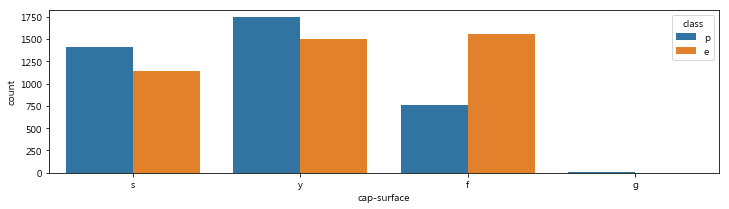

In [33]:
sns.countplot(data=data, x=data.columns[2], hue= 'class')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

- 변수간의 관계를 살펴보자

In [61]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
# pd.applymap(함수)  ==> 원소별 함수 적용

data_ord = pd.DataFrame()
data_ord = data.applymap(lambda x: ord(x)-ord('a'))

In [63]:
data_ord.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,15,23,18,13,19,15,5,2,13,10,...,18,22,22,15,22,14,15,10,18,20
1,4,23,18,24,19,0,5,2,1,10,...,18,22,22,15,22,14,15,13,13,6
2,4,1,18,22,19,11,5,2,1,13,...,18,22,22,15,22,14,15,13,13,12
3,15,23,24,22,19,15,5,2,13,13,...,18,22,22,15,22,14,15,10,18,20
4,4,23,18,6,5,13,5,22,1,10,...,18,22,22,15,22,14,4,13,0,6


In [64]:
data_ord.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.013877,0.179558,-0.038469,-0.501530,-0.088603,0.129200,-0.348387,0.540024,-0.558974,...,-0.354768,-0.144253,-0.138484,NaN,0.151187,-0.207646,-0.358792,0.133768,0.307307,0.225089
cap-shape,0.013877,1.000000,-0.048149,-0.005568,-0.006983,-0.061453,0.063103,0.023312,0.018421,0.019578,...,-0.008918,-0.008351,-0.006735,NaN,0.062916,-0.081545,0.030445,-0.082280,0.032433,-0.044782
cap-surface,0.179558,-0.048149,1.000000,0.009685,0.067589,0.076905,-0.038322,-0.279372,0.211024,-0.167157,...,0.094183,0.054762,0.057686,NaN,-0.024844,-0.011742,-0.124144,0.225909,0.021237,0.172467
cap-color,-0.038469,-0.005568,0.009685,1.000000,0.004651,-0.283445,-0.007061,0.132869,-0.111117,0.078669,...,-0.019982,0.113321,0.116622,NaN,-0.016198,-0.012487,0.148149,-0.221267,-0.113398,0.041234
bruises,-0.501530,-0.006983,0.067589,0.004651,1.000000,-0.053415,0.137359,-0.299473,-0.369596,0.547180,...,0.495784,0.054388,0.063216,NaN,0.129493,0.047317,0.653071,-0.248381,0.080469,-0.085181
odor,-0.088603,-0.061453,0.076905,-0.283445,-0.053415,1.000000,-0.050749,0.042856,0.320905,-0.157872,...,0.101077,0.117887,0.114487,NaN,-0.050063,0.091322,-0.331930,0.488106,-0.065238,0.012020
gill-attachment,0.129200,0.063103,-0.038322,-0.007061,0.137359,-0.050749,1.000000,0.071489,0.108984,-0.138857,...,-0.120610,0.106378,0.104684,NaN,0.952313,0.056000,-0.141086,0.001507,0.218453,-0.073109
gill-spacing,-0.348387,0.023312,-0.279372,0.132869,-0.299473,0.042856,0.071489,1.000000,-0.108333,0.105130,...,-0.171500,0.333312,0.315356,NaN,0.071527,0.245353,-0.216351,0.064109,-0.465139,-0.162719
gill-size,0.540024,0.018421,0.211024,-0.111117,-0.369596,0.320905,0.108984,-0.108333,1.000000,-0.529465,...,-0.001326,0.255845,0.240231,NaN,0.106033,-0.186245,-0.496474,0.616063,0.184522,0.196221
gill-color,-0.558974,0.019578,-0.167157,0.078669,0.547180,-0.157872,-0.138857,0.105130,-0.529465,1.000000,...,0.306453,-0.029929,-0.045249,NaN,-0.118895,0.122835,0.635853,-0.403413,-0.073192,-0.211227


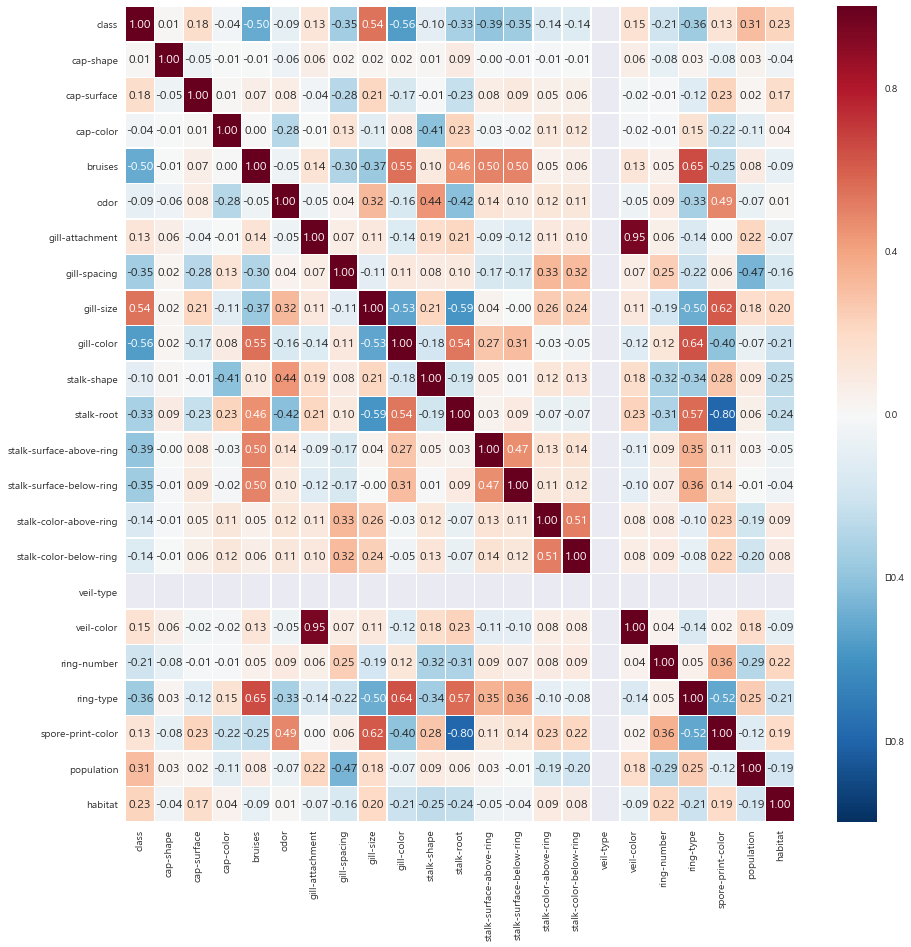

In [79]:
# Using Advanced Plotting Tool to plot correlation 

plt.figure(figsize=(15,15))
sns.heatmap(data = data_ord.corr(), annot=True, fmt = '.2f', linewidths=.5)   #anoot = 값 표시 옵션,   fmt 는 값 표시시, 포맷팅

In [83]:
data_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-type                   8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8

In [84]:
for column in data_ord:
    data_ord[column]=data_ord[column].astype('category')

In [86]:
data2 = data.copy()

In [92]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in data2:
    data2[column]=le.fit_transform(data2[column])


In [93]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-type                   8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8

In [89]:
data2.corr()

""


In [91]:
data_ord.corr()

""


In [85]:
data_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null category
cap-shape                   8124 non-null category
cap-surface                 8124 non-null category
cap-color                   8124 non-null category
bruises                     8124 non-null category
odor                        8124 non-null category
gill-attachment             8124 non-null category
gill-spacing                8124 non-null category
gill-size                   8124 non-null category
gill-color                  8124 non-null category
stalk-shape                 8124 non-null category
stalk-root                  8124 non-null category
stalk-surface-above-ring    8124 non-null category
stalk-surface-below-ring    8124 non-null category
stalk-color-above-ring      8124 non-null category
stalk-color-below-ring      8124 non-null category
veil-type                   8124 non-null category
veil-color                

 - 속성별로 살펴보자...

In [66]:
results=[]
for fe in data.columns[1:]:
    
    for att in set(data[fe]):
        
        count_p = len(data[(data[fe] == att) & (data.iloc[:,0]== 'p')])
        count_e = len(data[(data[fe] == att) & (data.iloc[:,0] == 'e')])
        result = [fe, att, count_p, count_e, count_p/(count_p+count_e), count_e/(count_p+count_e)]
        results.append(result)

In [67]:
results[:20]

[['cap-shape', 'f', 1556, 1596, 0.4936548223350254, 0.5063451776649747],
 ['cap-shape', 'b', 48, 404, 0.10619469026548672, 0.8938053097345132],
 ['cap-shape', 's', 0, 32, 0.0, 1.0],
 ['cap-shape', 'k', 600, 228, 0.7246376811594203, 0.2753623188405797],
 ['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-shape', 'x', 1708, 1948, 0.4671772428884026, 0.5328227571115973],
 ['cap-surface', 'f', 760, 1560, 0.3275862068965517, 0.6724137931034483],
 ['cap-surface', 's', 1412, 1144, 0.5524256651017214, 0.4475743348982786],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['cap-surface', 'y', 1740, 1504, 0.5363748458692972, 0.4636251541307028],
 ['cap-color', 'w', 320, 720, 0.3076923076923077, 0.6923076923076923],
 ['cap-color', 'e', 876, 624, 0.584, 0.416],
 ['cap-color', 'p', 88, 56, 0.6111111111111112, 0.3888888888888889],
 ['cap-color', 'u', 0, 16, 0.0, 1.0],
 ['cap-color', 'b', 120, 48, 0.7142857142857143, 0.2857142857142857],
 ['cap-color', 'y', 672, 400, 0.6268656716417911, 0.373134328358209],
 ['cap-colo

In [68]:
data_cal = pd.DataFrame(results, columns = ['분류', '속성', '독버섯수','식용버섯수', '독버섯확률','식용버섯확률'])

In [69]:
data_cal.head(10)

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
0,cap-shape,f,1556,1596,0.493655,0.506345
1,cap-shape,b,48,404,0.106195,0.893805
2,cap-shape,s,0,32,0.000000,1.000000
3,cap-shape,k,600,228,0.724638,0.275362
4,cap-shape,c,4,0,1.000000,0.000000
5,cap-shape,x,1708,1948,0.467177,0.532823
6,cap-surface,f,760,1560,0.327586,0.672414
7,cap-surface,s,1412,1144,0.552426,0.447574
8,cap-surface,g,4,0,1.000000,0.000000
9,cap-surface,y,1740,1504,0.536375,0.463625


그래프로 살펴보기

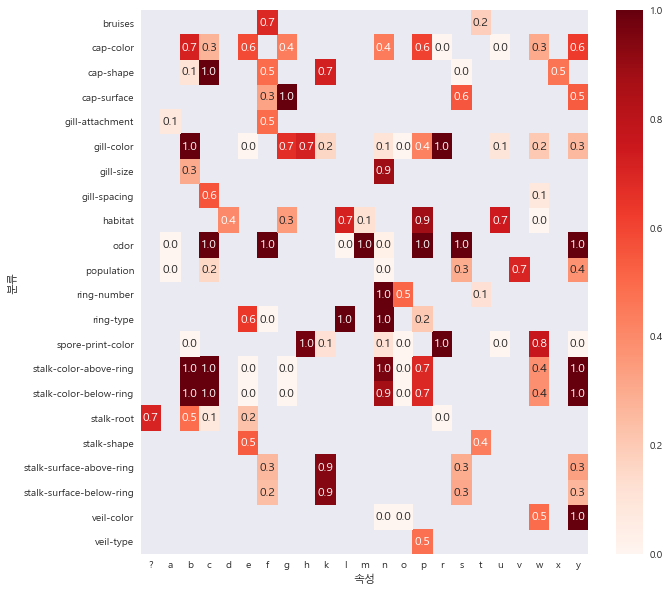

In [82]:
plt.figure(figsize=(10,10))
data_cal_heat = data_cal.pivot('분류','속성','독버섯확률')
sns.heatmap(data = data_cal_heat, annot = True, fmt = '.1f', cmap = 'Reds')

 - 분류기준별 데이터 시각화

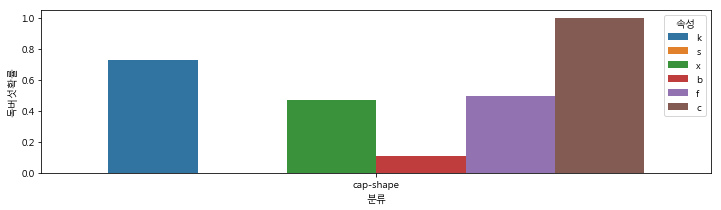

In [105]:
sns.barplot(data = data_cal[data_cal['분류'] == data_cal.columns[0]], x ='분류', y = '독버섯확률', hue = '속성')

In [95]:
data_cal.columns[2]

'독버섯수'

In [96]:
ss = list(set(data_cal['분류']))

In [97]:
type(ss)

list

In [98]:
len(ss)

22

In [99]:
ss[2]

'stalk-color-above-ring'

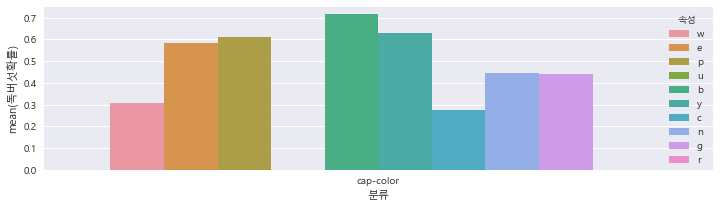

In [100]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[0]], x ='분류', y = '독버섯확률', hue = '속성')

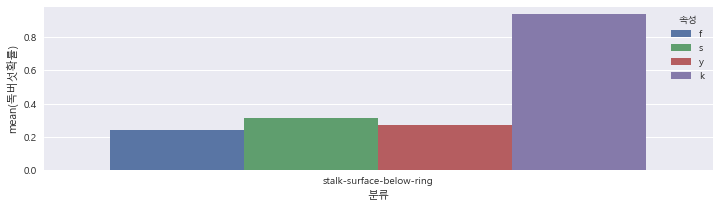

In [101]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[1]], x ='분류', y = '독버섯확률', hue = '속성')

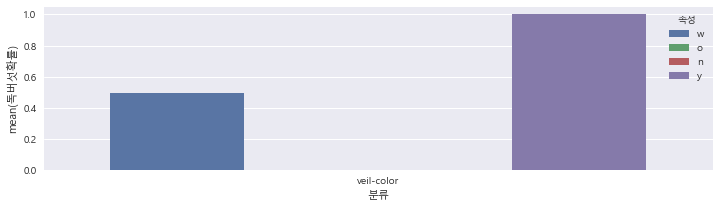

In [102]:
sns.barplot(data = data_cal[data_cal['분류'] == ss[5]], x ='분류', y = '독버섯확률', hue = '속성')

In [103]:
# 독버섯 확률순으로 정렬하기 @리스트
results_sort = sorted(results, key = lambda x:x[4], reverse =True)

In [104]:
results_sort[:20]

[['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['odor', 'f', 2160, 0, 1.0, 0.0],
 ['odor', 'p', 256, 0, 1.0, 0.0],
 ['odor', 's', 576, 0, 1.0, 0.0],
 ['odor', 'y', 576, 0, 1.0, 0.0],
 ['odor', 'm', 36, 0, 1.0, 0.0],
 ['odor', 'c', 192, 0, 1.0, 0.0],
 ['gill-color', 'b', 1728, 0, 1.0, 0.0],
 ['gill-color', 'r', 24, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'b', 432, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'y', 8, 0, 1.0, 0.0],
 ['stalk-color-above-ring', 'c', 36, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'b', 432, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'y', 24, 0, 1.0, 0.0],
 ['stalk-color-below-ring', 'c', 36, 0, 1.0, 0.0],
 ['veil-color', 'y', 8, 0, 1.0, 0.0],
 ['ring-number', 'n', 36, 0, 1.0, 0.0],
 ['ring-type', 'l', 1296, 0, 1.0, 0.0],
 ['ring-type', 'n', 36, 0, 1.0, 0.0]]

In [105]:
# 독버섯 확률 순으로 정렬하기 @Pandas
data_cal_sort = data_cal.sort_values(by='독버섯확률', ascending=False)
data_cal_sort.head(20)

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
93,ring-type,l,1296,0,1.0,0.0
29,odor,c,192,0,1.0,0.0
103,spore-print-color,r,72,0,1.0,0.0
22,odor,f,2160,0,1.0,0.0
23,odor,p,256,0,1.0,0.0
26,odor,s,576,0,1.0,0.0
27,odor,y,576,0,1.0,0.0
28,odor,m,36,0,1.0,0.0
94,ring-type,n,36,0,1.0,0.0
69,stalk-color-above-ring,y,8,0,1.0,0.0


# 2. 데이터 나누기(학습/테스트)

In [106]:
data_x = data.iloc[:,1:]
data_y = data.iloc[:,0]

In [107]:
data_x.columns[1]

'cap-surface'

In [84]:
##삭제가능
results=[]
for fe in data_x.columns:
    
    for att in set(data[fe]):
        
        count_p = len(data_x[(data_x[fe] == att) & (data_y == 'p')])
        count_e = len(data_x[(data_x[fe] == att) & (data_y == 'e')])
        result = [fe, att, count_p, count_e, count_p/(count_p+count_e), count_e/(count_p+count_e)]
        results.append(result)

In [85]:
#삭제가능
results

[['cap-shape', 'k', 600, 228, 0.7246376811594203, 0.2753623188405797],
 ['cap-shape', 's', 0, 32, 0.0, 1.0],
 ['cap-shape', 'x', 1708, 1948, 0.4671772428884026, 0.5328227571115973],
 ['cap-shape', 'b', 48, 404, 0.10619469026548672, 0.8938053097345132],
 ['cap-shape', 'f', 1556, 1596, 0.4936548223350254, 0.5063451776649747],
 ['cap-shape', 'c', 4, 0, 1.0, 0.0],
 ['cap-surface', 'y', 1740, 1504, 0.5363748458692972, 0.4636251541307028],
 ['cap-surface', 'g', 4, 0, 1.0, 0.0],
 ['cap-surface', 's', 1412, 1144, 0.5524256651017214, 0.4475743348982786],
 ['cap-surface', 'f', 760, 1560, 0.3275862068965517, 0.6724137931034483],
 ['cap-color', 'y', 672, 400, 0.6268656716417911, 0.373134328358209],
 ['cap-color', 'p', 88, 56, 0.6111111111111112, 0.3888888888888889],
 ['cap-color', 'u', 0, 16, 0.0, 1.0],
 ['cap-color', 'e', 876, 624, 0.584, 0.416],
 ['cap-color', 'b', 120, 48, 0.7142857142857143, 0.2857142857142857],
 ['cap-color', 'n', 1020, 1264, 0.44658493870402804, 0.553415061295972],
 ['cap-co

In [88]:
#삭제가능
data_cal = pd.DataFrame(results, columns = ['분류', '속성', '독버섯수','식용버섯수', '독버섯확률','식용버섯확률'])

In [64]:
#삭제가능
pd.value_counts(data.groupby(data_x.columns[1],'class'))

ValueError: No axis named class for object type <class 'pandas.core.frame.DataFrame'>

# 3. 분류모델 학습하기

### pd.get_dummies: 명목형 변수 정리하기

In [108]:
data_x = pd.get_dummies(data_x, drop_first=True)   # one-hot

In [111]:
data_x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# c.f) 교재내용
# 데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []
    for col, v in enumerate(row.iloc[1:]):   # enumerate : 값과 index를 반환할 때 사용
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]    # 하나의 특징을 총 12개의 요소를 가지는 배열로 one hot encoding 합니다. (22 * 12)
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

In [109]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(data_x, data_y) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [110]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# 4. 분류 결과 확인하기

In [112]:
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          e       1.00      1.00      1.00      1052
          p       1.00      1.00      1.00       979

avg / total       1.00      1.00      1.00      2031



# 5. 결과 해석하기

In [113]:
ifs = clf.feature_importances_  # feature(변수) 별 중요도 계산

factor_check ={}
for i, score in enumerate(ifs):
#     print('{} : {}'.format(data_x.columns.values[i] , score))
    factor_check[data_x.columns.values[i]]=score
print(factor_check)    

{'cap-shape_c': 0.0004748778601788714, 'cap-shape_f': 0.0013984333589116341, 'cap-shape_k': 9.8741325025313435e-05, 'cap-shape_s': 0.00036491398139442695, 'cap-shape_x': 0.0010429838675411554, 'cap-surface_g': 2.5081424324813705e-05, 'cap-surface_s': 0.0012486077278607618, 'cap-surface_y': 0.00284512914830633, 'cap-color_c': 0.001097460889735363, 'cap-color_e': 0.0095808246582514481, 'cap-color_g': 4.4595624485354815e-05, 'cap-color_n': 0.00066563802542040089, 'cap-color_p': 0.0034888244812295716, 'cap-color_r': 0.00106232831619116, 'cap-color_u': 0.0, 'cap-color_w': 0.0019118857991959823, 'cap-color_y': 0.005241107994587723, 'bruises_t': 0.068282859390357831, 'odor_c': 0.012017346183697337, 'odor_f': 0.16171307931821249, 'odor_l': 0.0011717165274163408, 'odor_m': 0.00076666355209288389, 'odor_n': 0.089674397370988146, 'odor_p': 0.020932017398093628, 'odor_s': 0.020513136241866174, 'odor_y': 0.013267848567272067, 'gill-attachment_f': 0.0, 'gill-spacing_w': 0.025238215857776542, 'gill-s

In [115]:
sorted_factor = sorted(factor_check.items(), key=lambda x:x[1], reverse=True)  # 중요도 순으로 정렬하기

In [116]:
print(sorted_factor[:20])

[('odor_f', 0.16171307931821249), ('gill-size_n', 0.12223240497097068), ('odor_n', 0.089674397370988146), ('bruises_t', 0.068282859390357831), ('stalk-surface-above-ring_k', 0.054791499863830431), ('spore-print-color_h', 0.045590073565474593), ('stalk-surface-above-ring_s', 0.034535104437168042), ('stalk-root_b', 0.028366836506576808), ('gill-spacing_w', 0.025238215857776542), ('habitat_g', 0.022981953407388608), ('odor_p', 0.020932017398093628), ('odor_s', 0.020513136241866174), ('ring-type_l', 0.020379478983513111), ('population_v', 0.018354449253681356), ('spore-print-color_w', 0.017745251532966889), ('stalk-root_e', 0.016686003522584831), ('spore-print-color_k', 0.015000109670578157), ('stalk-shape_t', 0.014731568056042768), ('population_y', 0.013946375186996762), ('odor_y', 0.013267848567272067)]


In [121]:
from pprint import pprint  # 프린트 예쁘게 (줄바꿈 같은거...)

In [122]:
pprint(sorted_factor[:20])

[('odor_f', 0.16171307931821249),
 ('gill-size_n', 0.12223240497097068),
 ('odor_n', 0.089674397370988146),
 ('bruises_t', 0.068282859390357831),
 ('stalk-surface-above-ring_k', 0.054791499863830431),
 ('spore-print-color_h', 0.045590073565474593),
 ('stalk-surface-above-ring_s', 0.034535104437168042),
 ('stalk-root_b', 0.028366836506576808),
 ('gill-spacing_w', 0.025238215857776542),
 ('habitat_g', 0.022981953407388608),
 ('odor_p', 0.020932017398093628),
 ('odor_s', 0.020513136241866174),
 ('ring-type_l', 0.020379478983513111),
 ('population_v', 0.018354449253681356),
 ('spore-print-color_w', 0.017745251532966889),
 ('stalk-root_e', 0.016686003522584831),
 ('spore-print-color_k', 0.015000109670578157),
 ('stalk-shape_t', 0.014731568056042768),
 ('population_y', 0.013946375186996762),
 ('odor_y', 0.013267848567272067)]


In [191]:
data_cal[data_cal['분류']=='odor']

,분류,속성,독버섯수,식용버섯수,독버섯확률,식용버섯확률
22,odor,y,576,0,1.000000,0.000000
23,odor,s,576,0,1.000000,0.000000
24,odor,p,256,0,1.000000,0.000000
25,odor,m,36,0,1.000000,0.000000
26,odor,n,120,3408,0.034014,0.965986
27,odor,f,2160,0,1.000000,0.000000
28,odor,c,192,0,1.000000,0.000000
29,odor,l,0,400,0.000000,1.000000
30,odor,a,0,400,0.000000,1.000000


#### 버섯 'odor' 분류
almond=a

anise=l

creosote=c

fishy=y

foul=f

musty=m

none=n

pungent=p

spicy=s


### 추가) pandas 활용하여 데이터 전환하기(정리)

In [ ]:
# cf) 교재 내용

# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))  # 참고 : ord() 는 문자의 아스키 값을 반환하여 줍니다. a ~ z -> 97 ~ 122, ? -> 63
    data.append(row_data)

### pandas 활용해서 데이터 변환하기   pd.applymap / pd.apply

In [38]:
# pd.applymap(함수)  ==> 원소별 함수 적용

data_ord = pd.DataFrame()
data_ord = data.applymap(lambda x: ord(x)-ord('a'))

In [39]:
data_ord.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,4,23,18,24,19,0,5,2,1,10,...,18,22,22,15,22,14,15,13,13,6
1,4,1,18,22,19,11,5,2,1,13,...,18,22,22,15,22,14,15,13,13,12
2,15,23,24,22,19,15,5,2,13,13,...,18,22,22,15,22,14,15,10,18,20
3,4,23,18,6,5,13,5,22,1,10,...,18,22,22,15,22,14,4,13,0,6
4,4,23,24,24,19,0,5,2,1,13,...,18,22,22,15,22,14,15,10,13,6


In [ ]:
# pd.apply(함수) ==>  column 별 함수 적용  /   cf) pd.apply(함수, axis = 1)

mr_edit3 = pd.DataFrame()
for column in mr.columns:
    mr_edit3[column] = mr[column].apply(lambda x: ord(x))